In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph()

In [12]:
with open('./datasets/business_dataset_new_orleans.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df = pd.read_json(data_json_str)
    
for index, row in df.iterrows():
    G.add_node(row['business_id'], name=row['name'], stars=row['stars'])
    
print(G.nodes(data=True))

[('M0XSSHqrASOnhgbWDJIpQA', {'name': 'Herb Import Co', 'stars': 4.0}), ('w_AMNoI1iG9eay7ncmc67w', {'name': 'River 127', 'stars': 3.0}), ('uczmbBk5O3tYhGue13dCDg', {'name': 'New Orleans Spirit Tours', 'stars': 4.0}), ('YNjyv0gfOr2g8lbmUpTnKg', {'name': 'Copper Vine', 'stars': 4.5}), ('J_ksUDPpzPwfTGtI4zTRnQ', {'name': 'Riverview Room', 'stars': 4.5}), ('TLZ3-eDPLhUzfsWO4ad6Ug', {'name': "Mahony's Po-Boys & Seafood", 'stars': 4.0}), ('FRYkg_JvsWU9xIXZsEZcVA', {'name': 'Altamura', 'stars': 3.5}), ('hUQ9Z7kQeabvhPOAQOVV1A', {'name': 'Rathbone Mansions', 'stars': 3.5}), ('4IcB3QyMEA85UTWFKh9O9A', {'name': "Eat Mah Taco @ Pal's Lounge", 'stars': 4.5}), ('Edg22x3CZkIv0GUib2oEFA', {'name': 'Mellow Mushroom', 'stars': 3.5}), ('FR5xx5YEzxAnoMdqGl7vRQ', {'name': 'Anytime Fitness', 'stars': 3.0}), ('jnyHs1ZXy9qIE2gORZBQMg', {'name': 'Style Lab For Men', 'stars': 4.0}), ('W57cR9a7XP6RX56MSWHJJA', {'name': 'Las Margaritas', 'stars': 3.5}), ('x7_p5O3ChQa7shdHCcLHZQ', {'name': "Olivier's Creole Restau

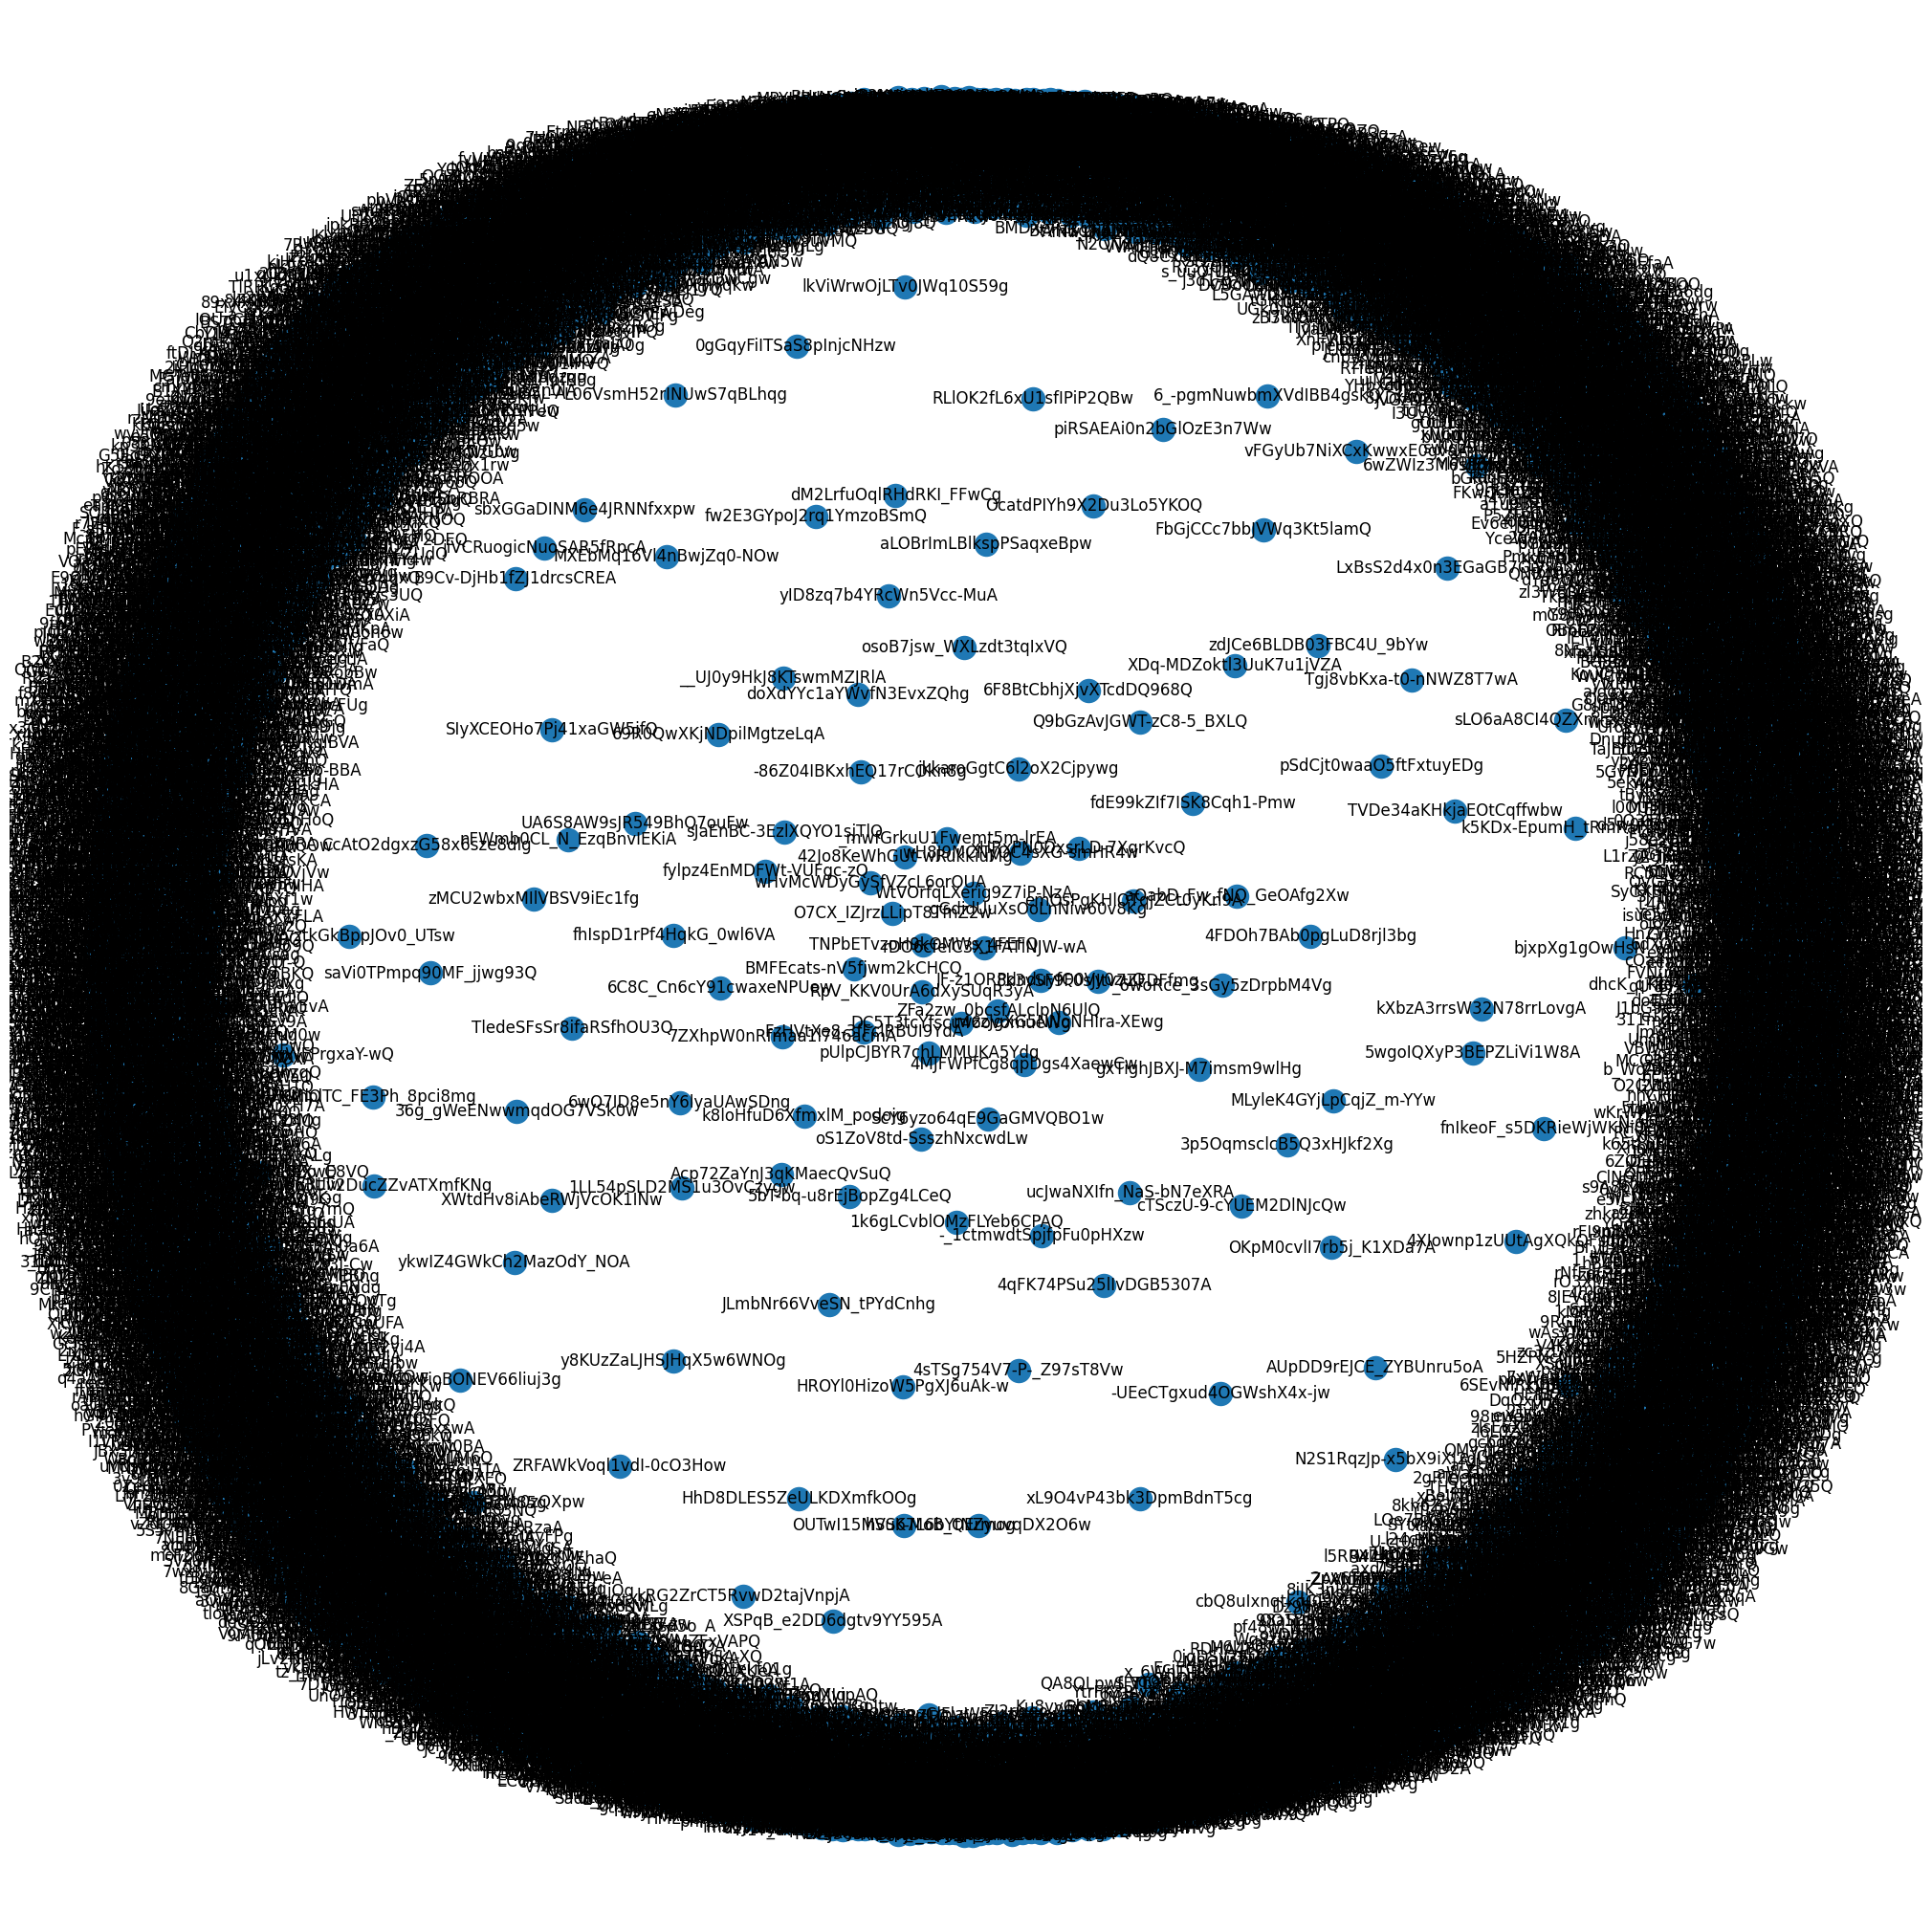

In [14]:
graph = nx.spring_layout(G)
plt.figure(figsize=(20,20))
nx.draw(G, graph, with_labels=True)

In [15]:
with open('./datasets/user_dataset_new_orleans.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df = pd.read_json(data_json_str)
    
user_graph = nx.Graph()
    
for index, row in df.iterrows():
    user_graph.add_node(row['user_id'], name=row['name'], review_count=row['review_count'])
    
# add edges between users, through their friends list
for index, row in df.iterrows():
    for friend in row['friends']:
        user_graph.add_edge(row['user_id'], friend)
    